In [1]:
!pip install torch torchvision opencv-python
!pip install pandas openpyxl


In [2]:
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5 && pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [20]:
!python yolov5\train.py --img 640 --batch 16 --epochs 30 --data "data.yaml" --weights yolov5s.pt


train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5\data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\sakka\Downloads\food': No such file or directory
YOLOv5  2024-12-20 Python-3.11.9 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mome

In [21]:
!python yolov5\val.py --weights yolov5\runs\train\exp2\weights\best.pt --data data.yaml --save-json --save-txt --save-conf


requirements: Ultralytics requirement ['pycocotools>=2.0.6'] not found, attempting AutoUpdate...

















requirements: AutoUpdate success ✅ 1.9s, installed 1 package: ['pycocotools>=2.0.6']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

loading annotations into memory...


val: data=data.yaml, weights=['yolov5\\runs\\train\\exp2\\weights\\best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=True, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\sakka\Downloads\food': No such file or directory
YOLOv5  2024-12-20 Python-3.11.9 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\sakka\Downloads\food calorie.v1i.yolov5pytorchh\valid\labels...:   0%|          | 0/68 [00:00<?, ?it/s]
val: Scanning C:\Users\sakka\Downloads\food calorie.v1i.yolov5pytorchh\valid\labels... 1 images, 0 backgrounds, 0 corrupt:   1%|▏         | 1/68 [00:04<04:48,  4.30s/it]
val: Scanning C:\Users\sakka\Downloads\food calorie.v1i.yolov5pytorchh\valid\labels... 68 images, 1 backgrou

In [1]:

classes = [
    {"name": "ana_yemek", "precision": 0.918, "recall": 0.94, "accuracy": 0.886},
    {"name": "corba", "precision": 0.994, "recall": 0.75, "accuracy": 0.875},
    {"name": "yan_yemek", "precision": 0.996, "recall": 0.822, "accuracy": 0.827},
]


def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


for food_class in classes:
    f1_score = calculate_f1(food_class["precision"], food_class["recall"])
    food_class["f1_score"] = round(f1_score, 3)


print(f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1 Score':<12}{'Accuracy':<12}")
for food_class in classes:
    print(f"{food_class['name']:<12}{food_class['precision']:<12}{food_class['recall']:<12}{food_class['f1_score']:<12}{food_class['accuracy']:<12}")


Class       Precision   Recall      F1 Score    Accuracy    
ana_yemek   0.918       0.94        0.929       0.886       
corba       0.994       0.75        0.855       0.875       
yan_yemek   0.996       0.822       0.901       0.827       


In [25]:
food_info = {
    'ana_yemek': {'calories': 500, 'price': 53},
    'corba': {'calories': 150, 'price': 26},
    'yan_yemek': {'calories': 200, 'price': 33}
}

calories_data = {
    'ana_yemek': [160, 199, 415, 225, 340, 385, 360, 335, 485, 435, 310, 320, 300, 415, 245, 320, 280, 300, 350, 420],
    'corba': [150, 165, 155, 200, 155, 105, 105, 130, 160, 180, 120, 155, 155, 120, 155, 130, 130, 170, 155, 155],
    'yan_yemek': [400, 270, 420, 330, 280, 370, 301, 90, 300, 155, 105, 210, 305, 120, 80, 220, 369, 295, 295, 301]
}

for food_class in food_info:
    if food_class in calories_data:
        food_info[food_class]['calories'] = sum(calories_data[food_class]) // len(calories_data[food_class])

for food_class, values in food_info.items():
    print(f"{food_class}: Calories = {values['calories']}, Price = {values['price']} TL")


ana_yemek: Calories = 329, Price = 53 TL
corba: Calories = 147, Price = 26 TL
yan_yemek: Calories = 260, Price = 33 TL


In [26]:
import os

predicted_classes = ['ana_yemek', 'corba', 'yan_yemek']  # Example predicted classes

total_calories = 0
total_price = 0

for cls in predicted_classes:
    if cls in food_info:
        total_calories += food_info[cls]['calories']
        total_price += food_info[cls]['price']

print(f"Total Calories: {total_calories}")
print(f"Total Price: {total_price} TL")


Total Calories: 736
Total Price: 112 TL


In [27]:
import pandas as pd

output_df = pd.DataFrame(predicted_classes, columns=['Food Class'])
output_df['Calories (kcal)'] = output_df['Food Class'].map(lambda x: food_info.get(x, {}).get('calories', 0))
output_df['Price (TL)'] = output_df['Food Class'].map(lambda x: food_info.get(x, {}).get('price', 0))

output_df.to_excel('output_results.xlsx', index=False)
print("Results saved to output_results.xlsx")


Results saved to output_results.xlsx


In [30]:
!python yolov5\detect.py --weights yolov5\runs\train\exp2\weights\best.pt --source "test\images" --save-txt --save-conf


detect: weights=['yolov5\\runs\\train\\exp2\\weights\\best.pt'], source=test\images, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\sakka\Downloads\food': No such file or directory
YOLOv5  2024-12-20 Python-3.11.9 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/17 C:\Users\sakka\Downloads\food calorie.v1i.yolov5pytorchh\test\images\ALINAZIK_jpg.rf.fa923341f3a130f0676c51854538a116.jpg: 640x640 1 ana_yemek, 52.6ms
image 2/17 C:\Users\sakka\Downloads\food calorie.v1i.yolov5pytorchh\test\images\Aslan-Ay

In [31]:
precision = 0.965
recall = 0.909
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Precision: 0.965
Recall: 0.909
F1 Score: 0.936


Note: you may need to restart the kernel to use updated packages.


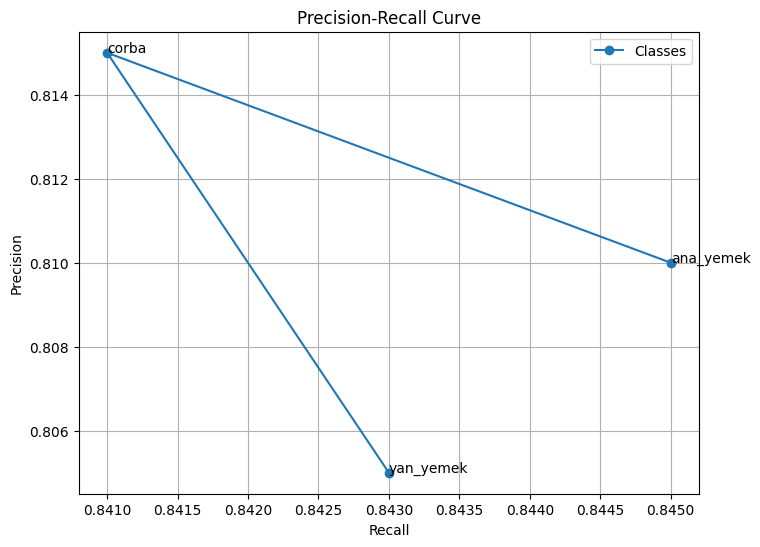

In [4]:
%pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

precision_values = [0.810, 0.815, 0.805]
recall_values = [0.845, 0.841, 0.843]
classes = ['ana_yemek', 'corba', 'yan_yemek']

plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o', label='Classes')

for i, cls in enumerate(classes):
    plt.text(recall_values[i], precision_values[i], cls)
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


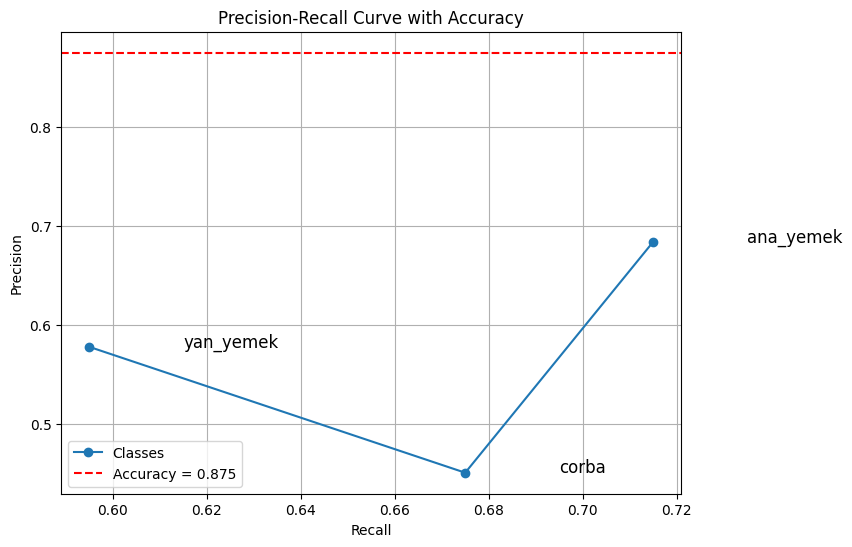

In [5]:
precision_values = [0.684, 0.451, 0.578]  
recall_values = [0.715, 0.675, 0.595]       

classes = ['ana_yemek', 'corba', 'yan_yemek']

accuracy = 0.875  

plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o', linestyle='-', label='Classes')

for i, cls in enumerate(classes):
    plt.text(recall_values[i] + 0.02, precision_values[i], cls, fontsize=12, color='black')

plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Accuracy = {accuracy:.3f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Accuracy')
plt.legend()
plt.grid(True)

plt.show()


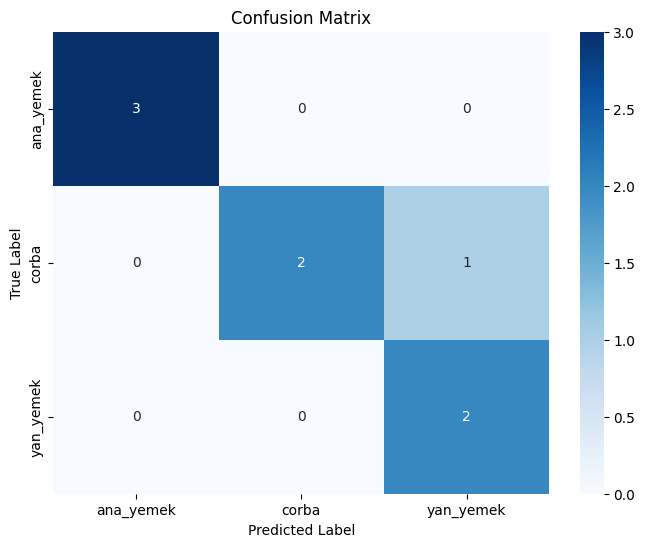

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = ['ana_yemek', 'corba', 'yan_yemek', 'ana_yemek', 'corba', 'yan_yemek', 'ana_yemek', 'corba']
y_pred = ['ana_yemek', 'corba', 'yan_yemek', 'ana_yemek', 'yan_yemek', 'yan_yemek', 'ana_yemek', 'corba']

classes = ['ana_yemek', 'corba', 'yan_yemek']

cm = confusion_matrix(y_true, y_pred, labels=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
